In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import string
from sklearn.cluster import KMeans
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [26]:
data = pd.read_csv("BankNote_Authentication.csv")
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


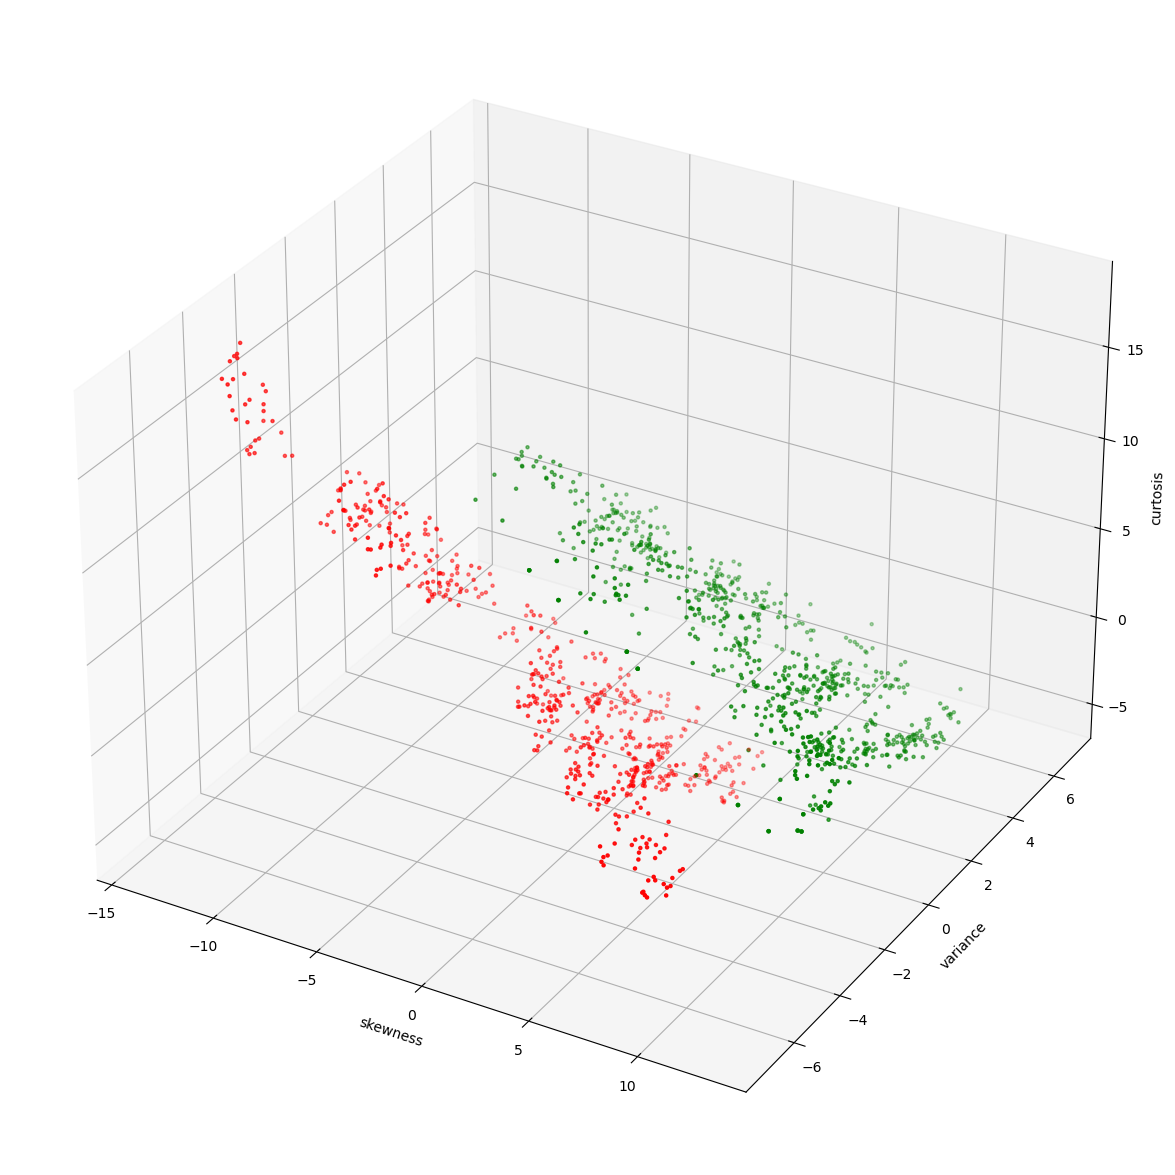

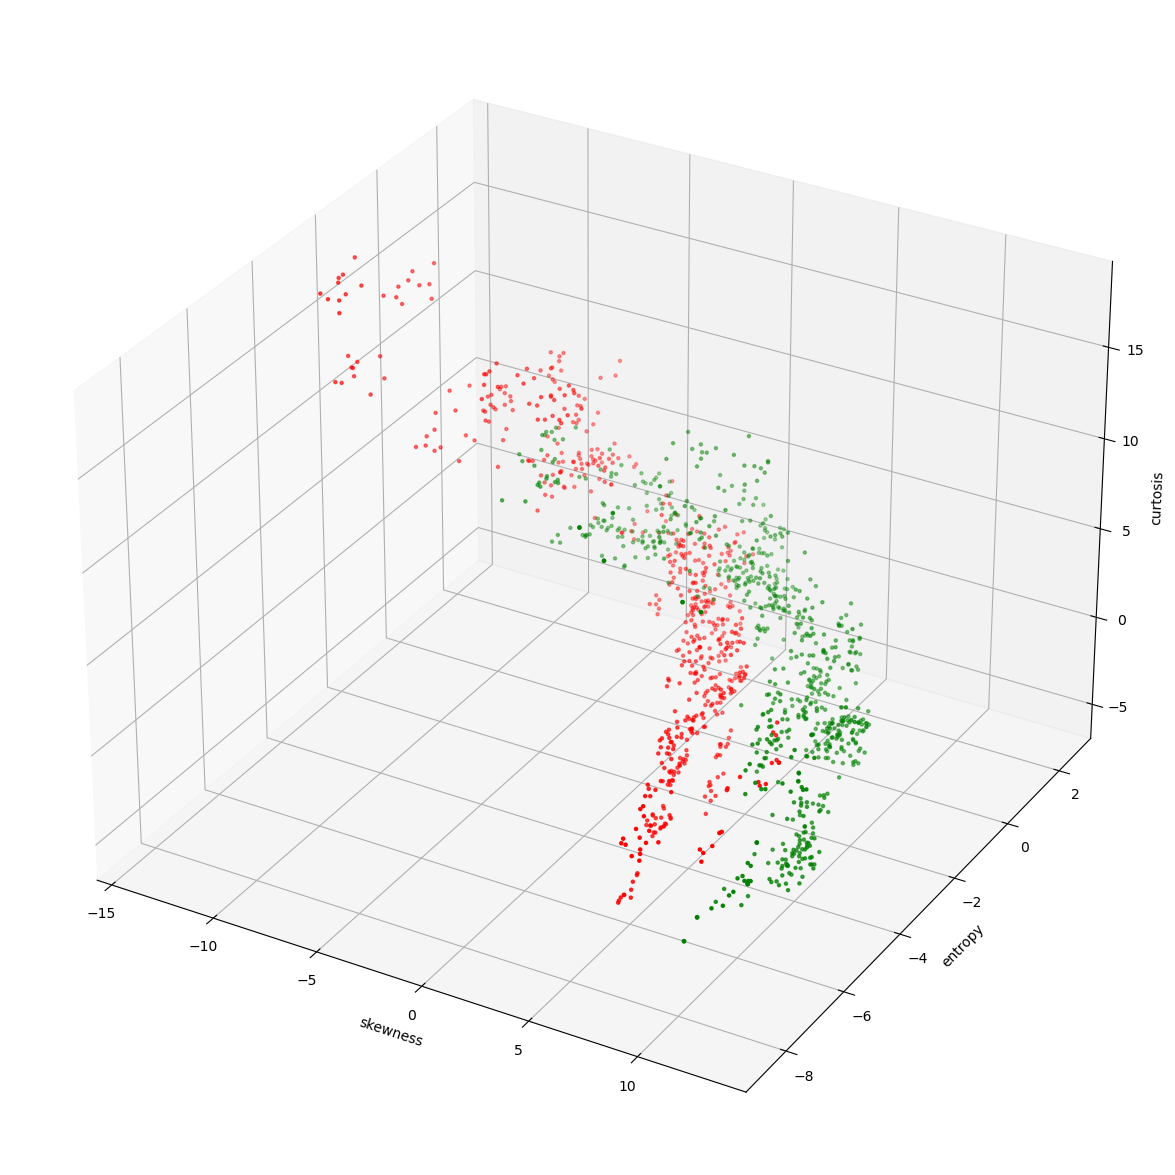

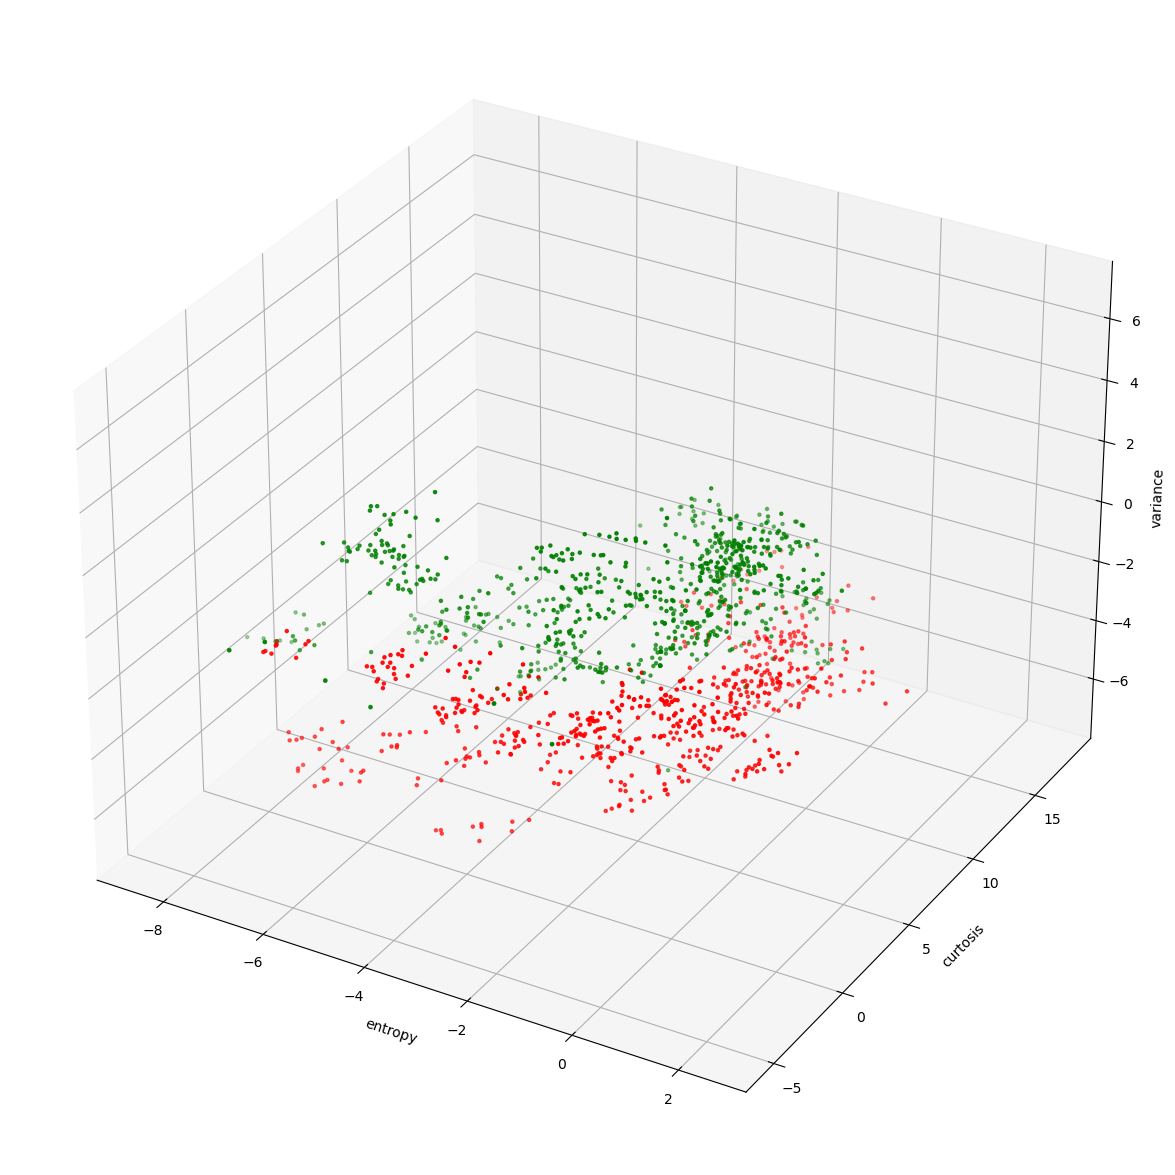

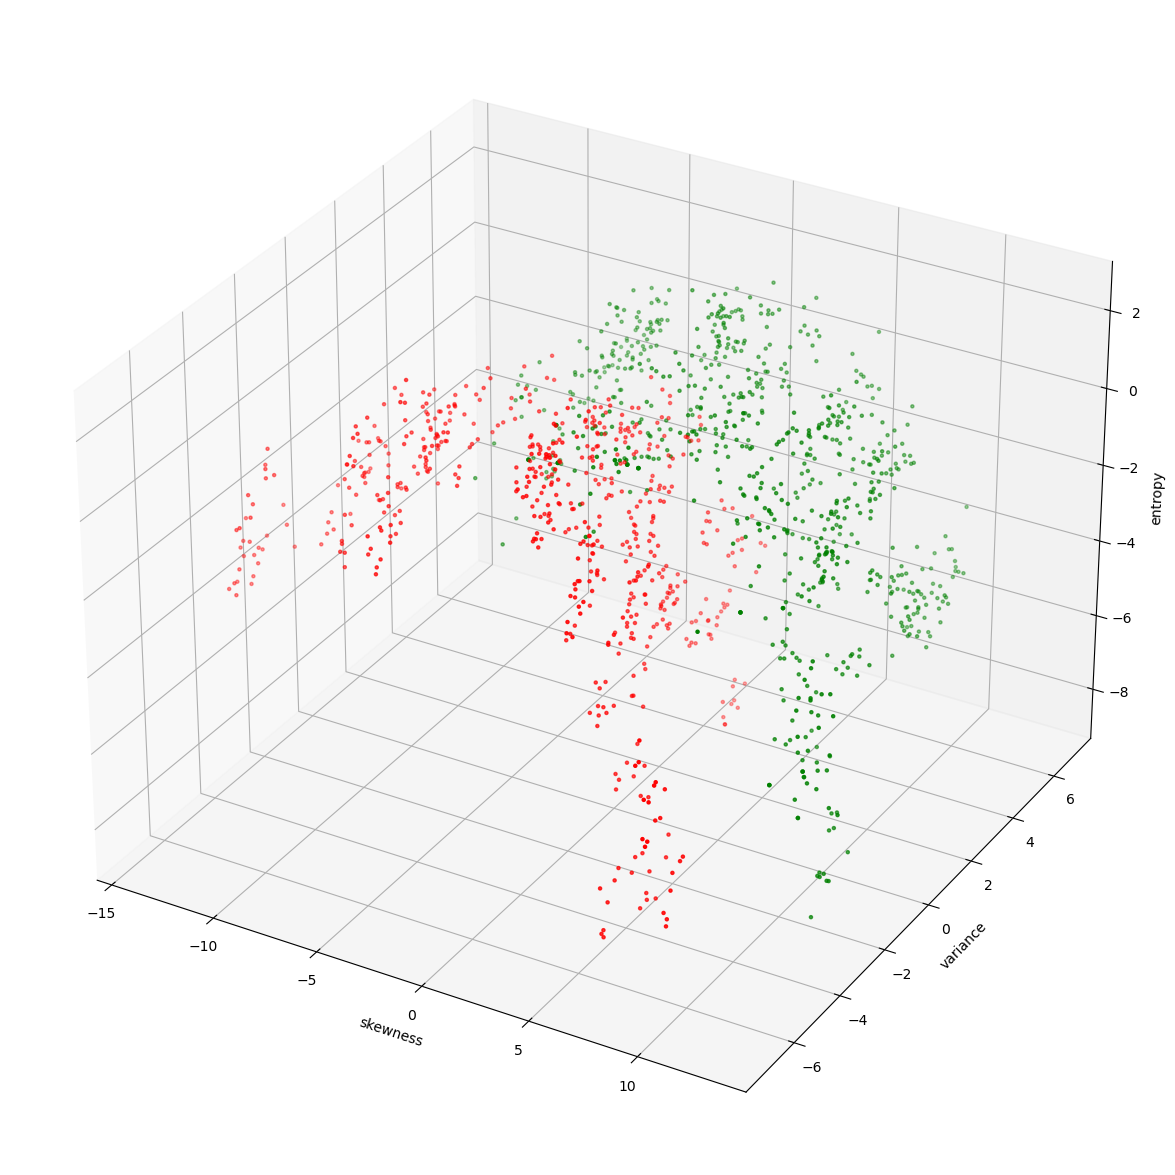

In [27]:
V_sets = [('skewness', 'variance', 'curtosis'), ('skewness', 'entropy', 'curtosis'), ('entropy', 'curtosis', 'variance'), ('skewness', 'variance', 'entropy')]

for (a,b,c) in V_sets:
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(data[data['class'] == 0][a], data[data['class'] == 0][b], data[data['class'] == 0][c],
              s=5, color='green')
    ax.scatter(data[data['class'] == 1][a], data[data['class'] == 1][b], data[data['class'] == 1][c],
              s=5, color='red')
    plt.xlabel(a)
    plt.ylabel(b)
    ax.set_zlabel(c)
    plt.show()

In [28]:
df = data.copy()
col_names = df.columns
df = pd.DataFrame(preprocessing.minmax_scale(df, feature_range=(0, 1), axis=0, copy=True))
df.columns = col_names
df.head()

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0


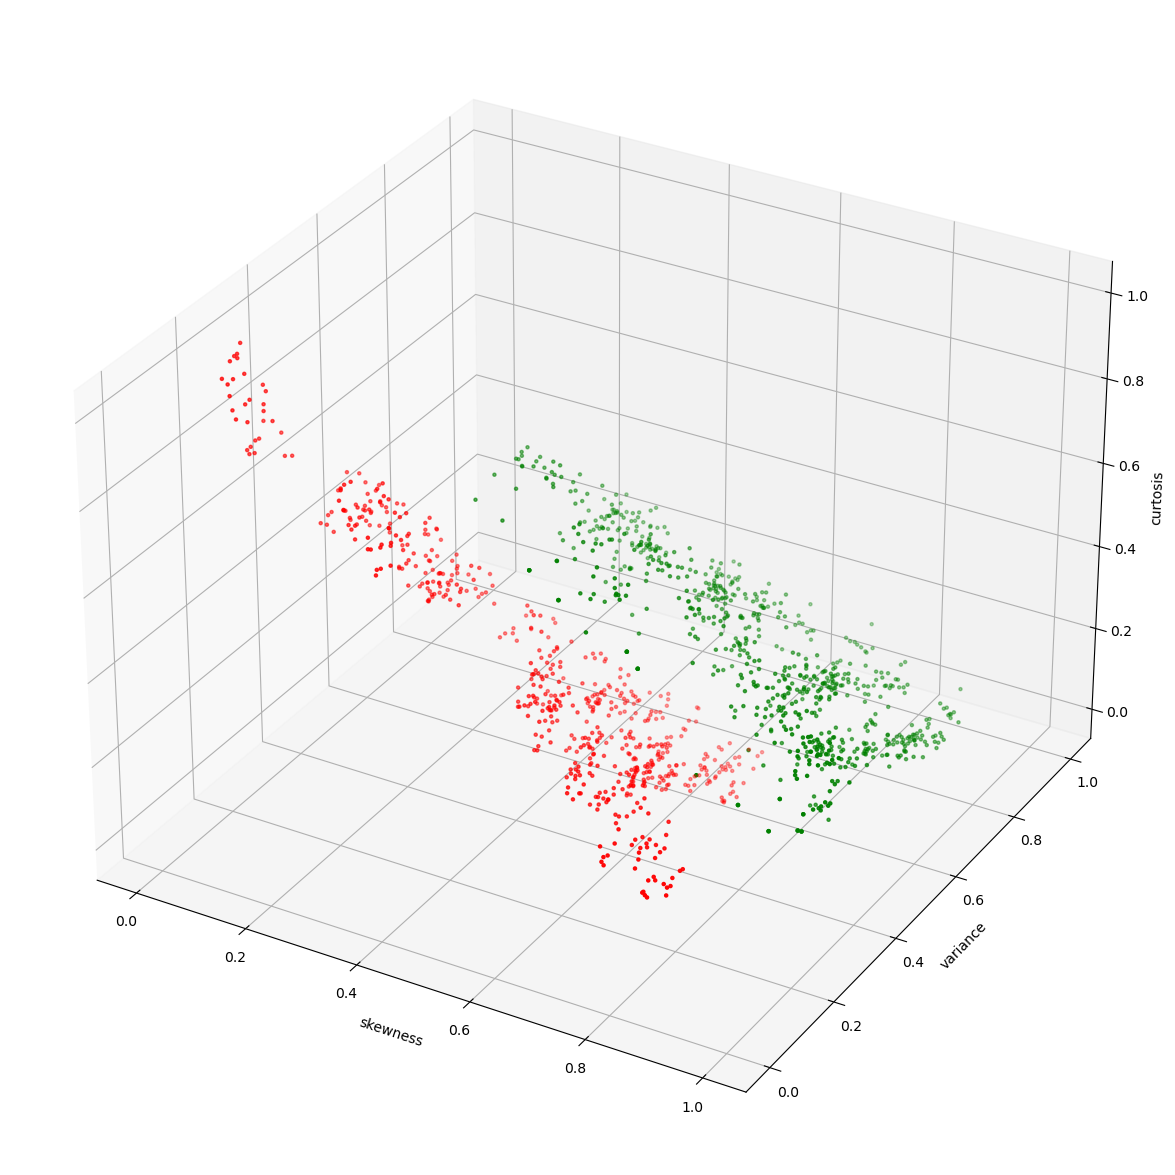

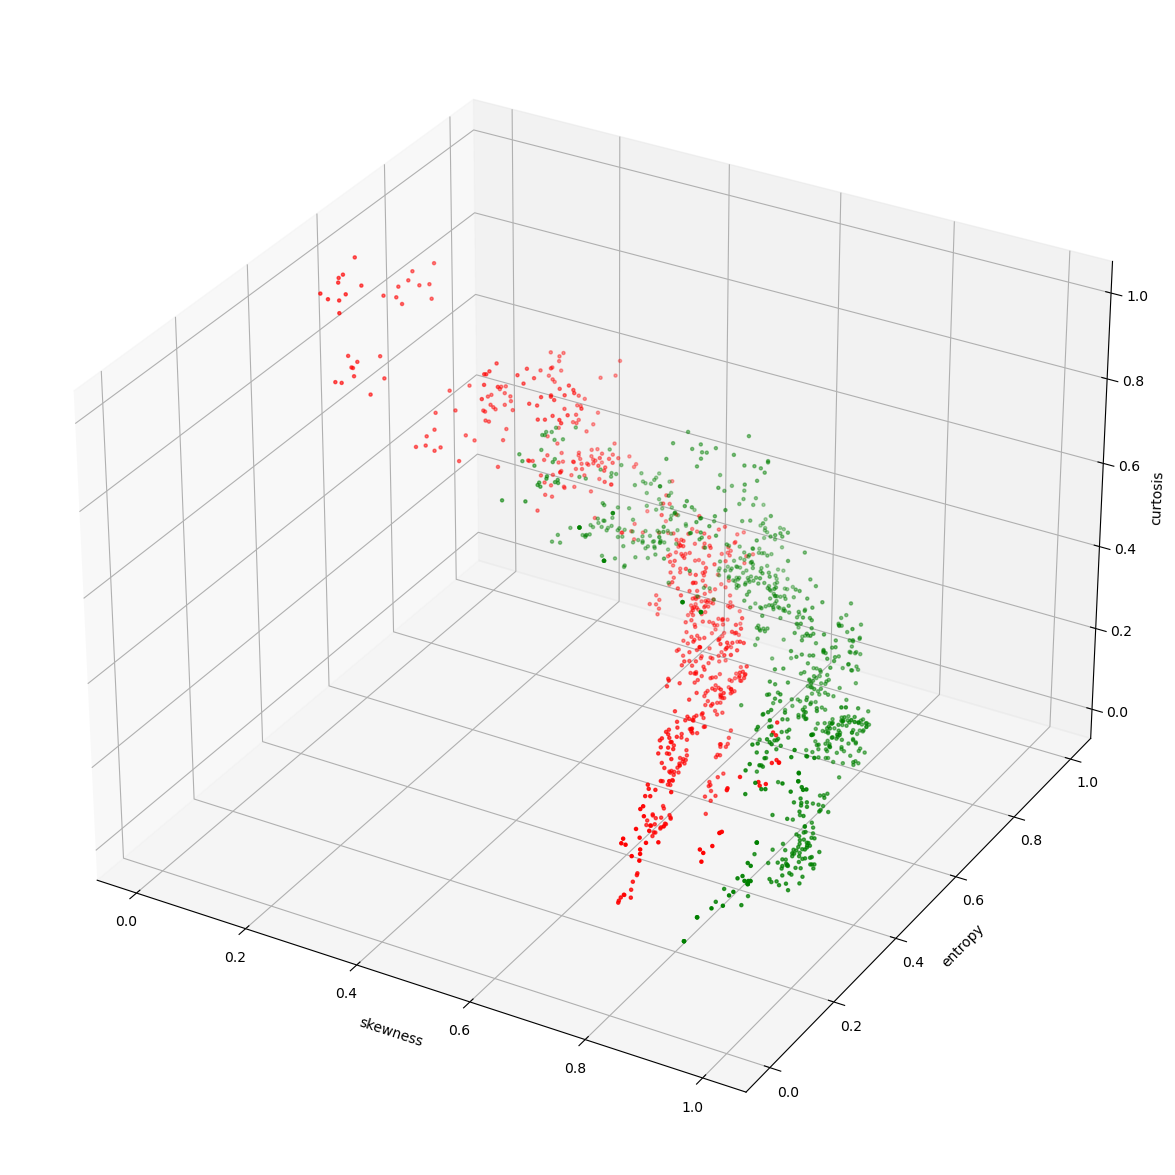

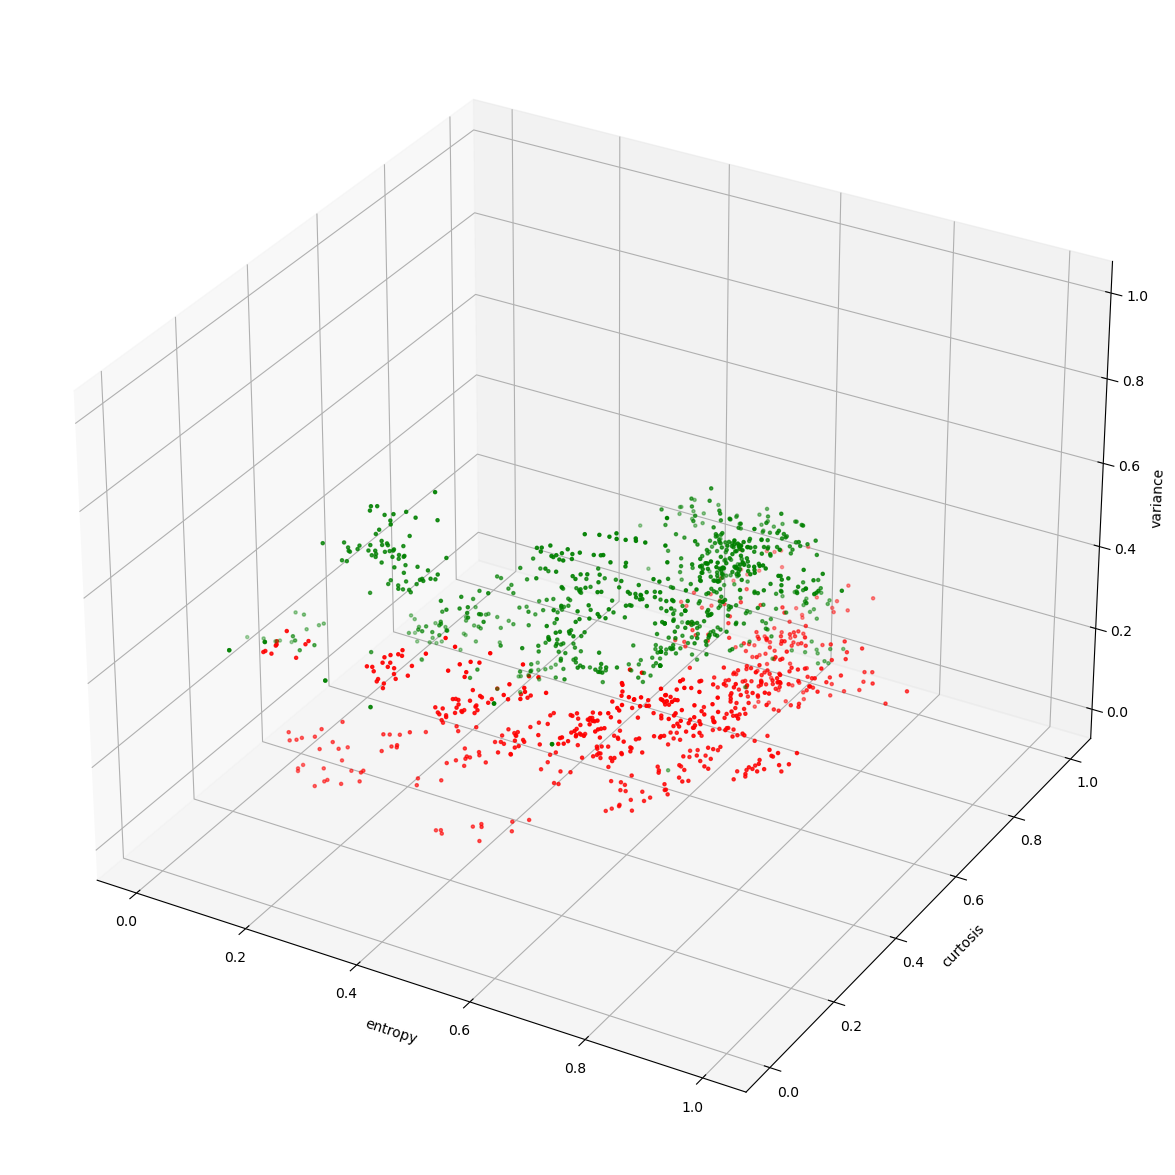

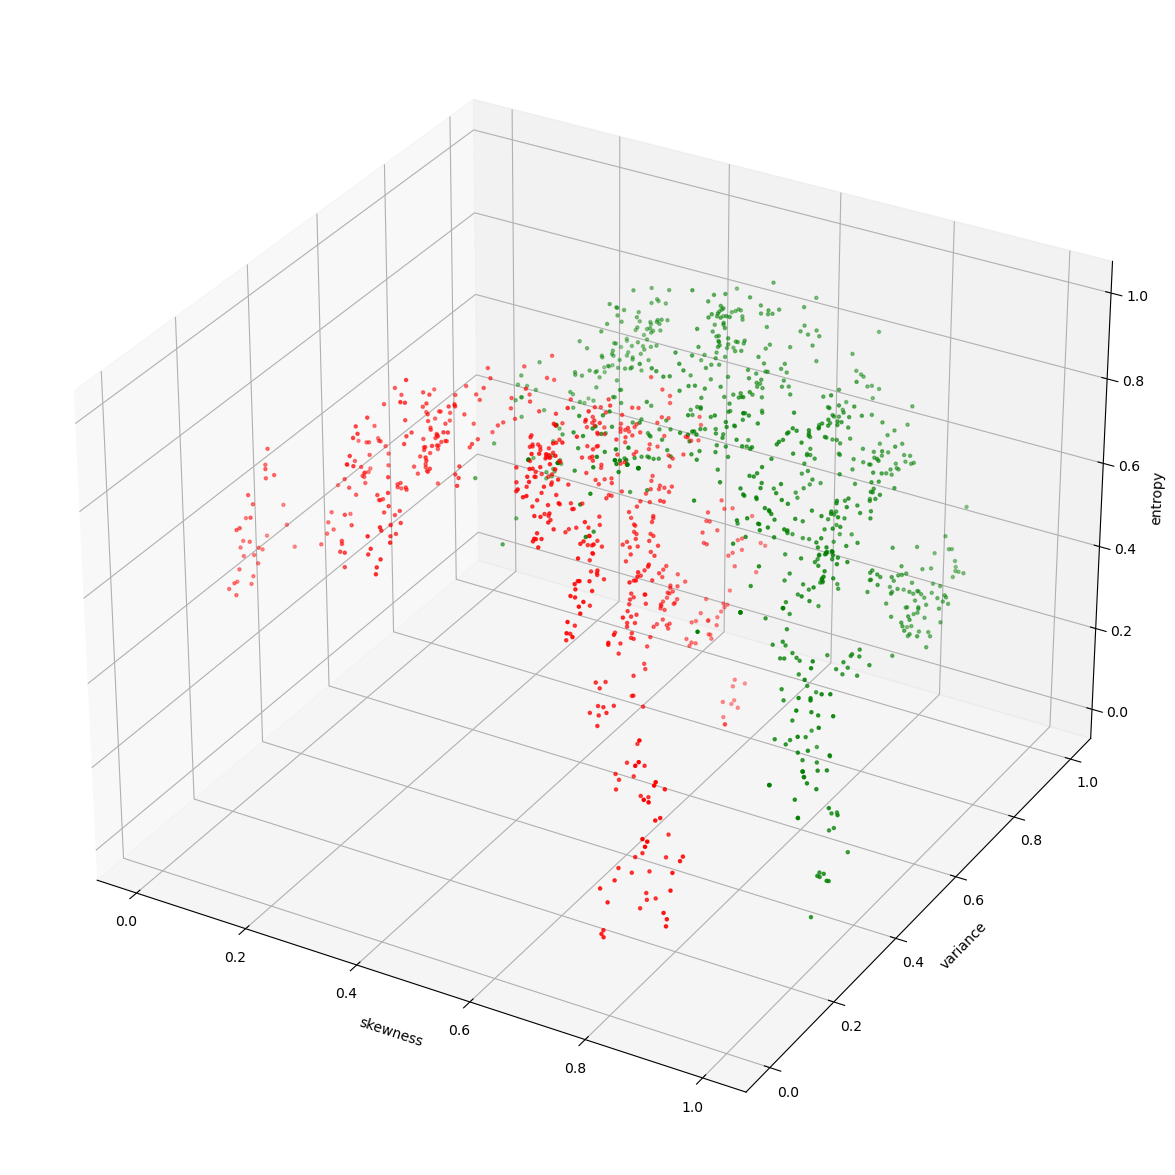

In [29]:
for (a,b,c) in V_sets:
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df[df['class'] == 0][a], df[df['class'] == 0][b], df[df['class'] == 0][c],
              s=5, color='green')
    ax.scatter(df[df['class'] == 1][a], df[df['class'] == 1][b], df[df['class'] == 1][c],
              s=5, color='red')
    plt.xlabel(a)
    plt.ylabel(b)
    ax.set_zlabel(c)
    plt.show()

In [30]:
df1 = df.copy()
df1.drop(['entropy','class'], axis=1, inplace=True)
df1

,variance,skewness,curtosis
0,0.769004,0.839643,0.106783
1,0.835659,0.820982,0.121804
2,0.786629,0.416648,0.310608
3,0.757105,0.871699,0.054921
4,0.531578,0.348662,0.424662
...,...,...,...
1367,0.537124,0.565855,0.165249
1368,0.407690,0.332868,0.506753
1369,0.237385,0.011768,0.985603
1370,0.250842,0.201701,0.761587


In [32]:
km1 = KMeans(n_clusters=2, random_state=42) 
km1.fit(df1)
df["KMeans1"] = km1.labels_ 
df

,variance,skewness,curtosis,entropy,class,KMeans1
0,0.769004,0.839643,0.106783,0.736628,0.0,0
1,0.835659,0.820982,0.121804,0.644326,0.0,0
2,0.786629,0.416648,0.310608,0.786951,0.0,1
3,0.757105,0.871699,0.054921,0.450440,0.0,0
4,0.531578,0.348662,0.424662,0.687362,0.0,1
...,...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0,0
1368,0.407690,0.332868,0.506753,0.808350,1.0,1
1369,0.237385,0.011768,0.985603,0.524755,1.0,1
1370,0.250842,0.201701,0.761587,0.660675,1.0,1


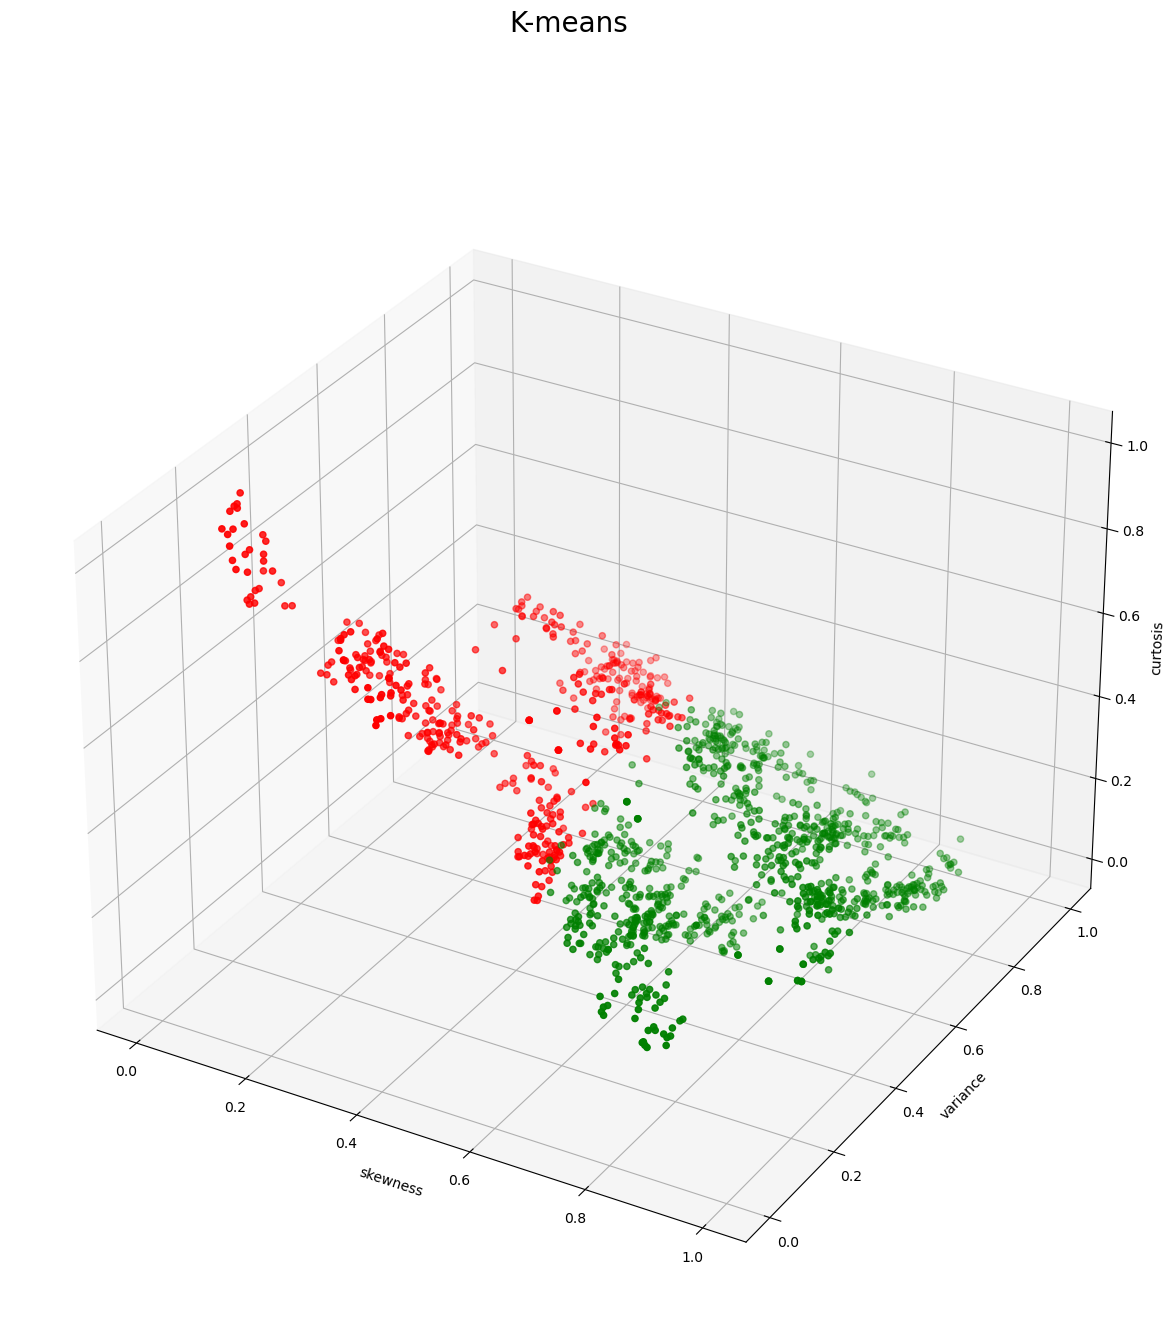

In [34]:
color = ['green', 'red']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
for label in np.unique(km1.labels_):
    df1_ = df1[label == km1.labels_]
    ax.scatter(df1_['skewness'], df1_['variance'], df1_['curtosis'], color = color[label])
plt.xlabel('skewness')
plt.ylabel('variance')
ax.set_zlabel('curtosis')
fig.suptitle('K-means', fontsize=20)
plt.show()

In [36]:
ag1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
ag1.fit(df1)
df['Agglomerative1'] = ag1.labels_
df

,variance,skewness,curtosis,entropy,class,KMeans1,Agglomerative1
0,0.769004,0.839643,0.106783,0.736628,0.0,0,0
1,0.835659,0.820982,0.121804,0.644326,0.0,0,0
2,0.786629,0.416648,0.310608,0.786951,0.0,1,0
3,0.757105,0.871699,0.054921,0.450440,0.0,0,0
4,0.531578,0.348662,0.424662,0.687362,0.0,1,1
...,...,...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0,0,0
1368,0.407690,0.332868,0.506753,0.808350,1.0,1,1
1369,0.237385,0.011768,0.985603,0.524755,1.0,1,1
1370,0.250842,0.201701,0.761587,0.660675,1.0,1,1


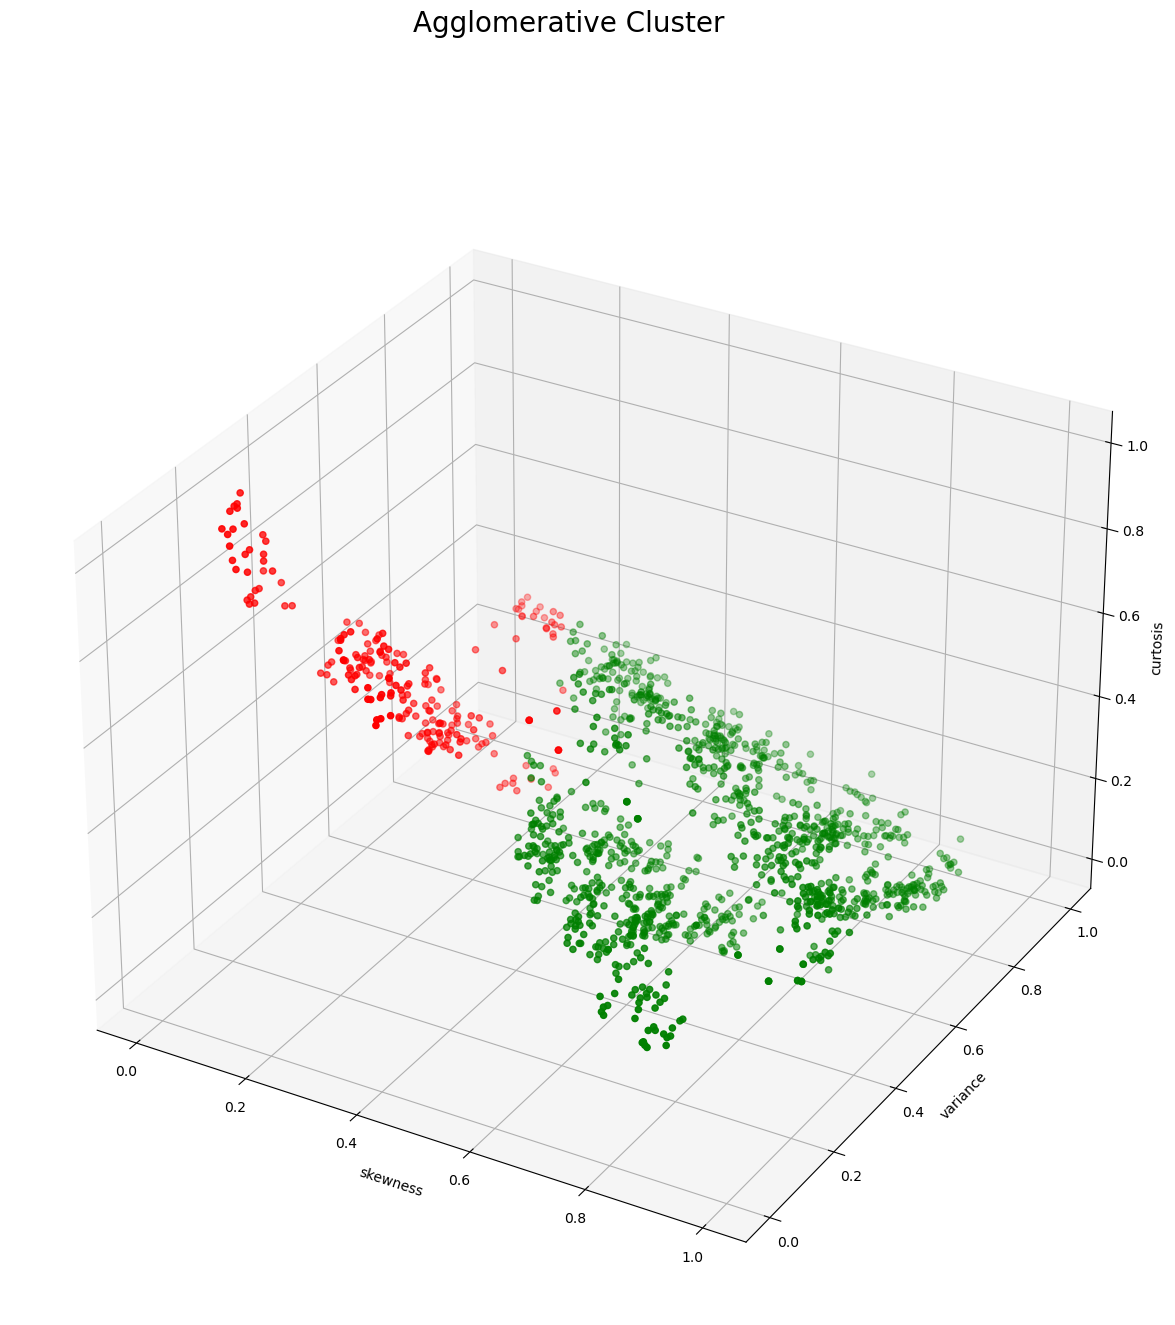

In [37]:
color = ['green', 'red']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
for label in np.unique(ag1.labels_):
    df1_ = df1[label == ag1.labels_]
    ax.scatter(df1_['skewness'], df1_['variance'], df1_['curtosis'], color = color[label])
plt.xlabel('skewness')
plt.ylabel('variance')
ax.set_zlabel('curtosis')
fig.suptitle('Agglomerative Cluster', fontsize=20)
plt.show()

In [22]:
df1=df.copy()
df1.drop(['curtosis','entropy'],axis=1,inplace=True)
df1.head()

,variance,skewness
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [24]:
col_names = df1.columns
from sklearn import preprocessing
data = pd.DataFrame(preprocessing.minmax_scale(df1, feature_range=(0, 1), axis=0, copy=True))
data.columns = col_names
data.head()

,variance,skewness
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

km = Kmeans(n_clusters = 2, random_state=42)
